# Pillow Library

In [106]:
from PIL import Image as Im

## Applications

- Basic image processing like:
    - Transformations: Geometric, Color , Point Transform
    - Enhancing image
    - Applying filter on images
    - Not only static images but **gifs** can also be edited
    - Simpler than openCV but openCV is much more flexible.
    - Especially used for data augmenetation though.
    - Image conversion in bulk.

### Why PILLOW ? We have openCV!!

- OpenCV is computer vision library while Pillow is image manipulation library.
- Easier to implement basic manipulation then openCV.
- openCV is superior as it gives more flexibility to work on granular aspects of an image and also computer vision algorithms.
- Best part easy to install.

## Big Picture of Pillow library

### Image Object : Most useful

In [107]:
from PIL import Image as Im
import os
path = #Enter the path of the image
os.chdir(path)

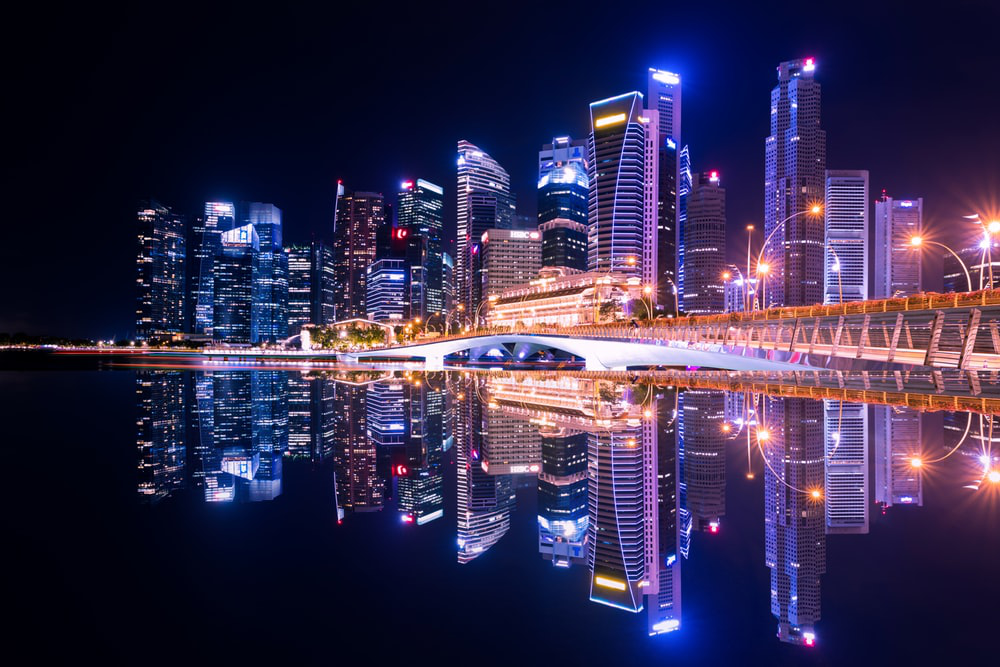

In [108]:
im = Im.open('test.jpg') # To open the image
im

In [109]:
print(im.size, im.mode , im.format)

(1000, 667) RGB JPEG


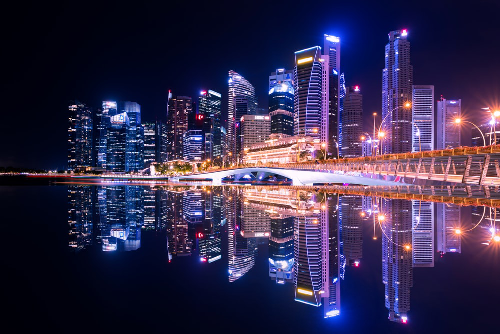

In [110]:
im = im.resize((500,334)) # geometric transformation
im

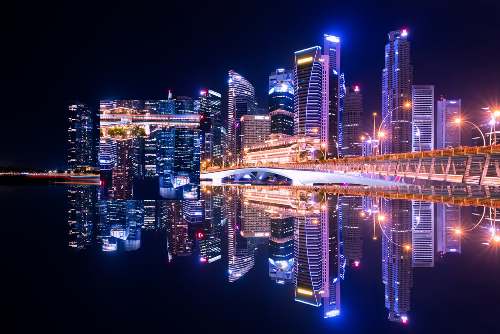

In [111]:
box = (100,100,200,200)  #Two points of a rectangle to be cropped
cropped_part = im.crop(box)
cropped_part = cropped_part.transpose(Im.ROTATE_180)
im.paste(cropped_part,box)
im

**Note**: Above concept can be used to roll the image

In [112]:
def roll(image, delta):
    "Roll an image sideways"

    xsize, ysize = image.size

    delta = delta % xsize
    if delta == 0: return image

    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))
    image.paste(part2, (0, 0, xsize-delta, ysize))
    image.paste(part1, (xsize-delta, 0, xsize, ysize))

    return image

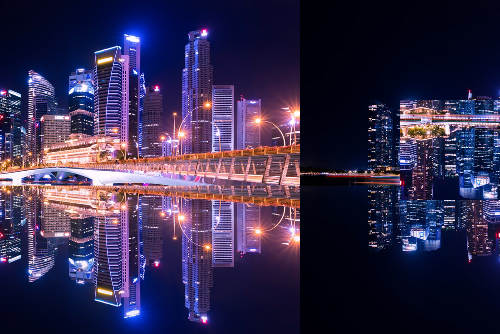

In [113]:
roll(im,200)

#### Bands of an image

- 'R'- Red band-first value of a pixel in an `RGB` image mode
- 'G'- Green band-second value of a pixel in an `RGB` image mode
- 'B'- Blue band-third value of a pixel in an `RGB` image mode
- 'A'- Alpha transparency band - Present in `PNG` image mode

In [114]:
im.getbands()  # Function used to get bands in image

('R', 'G', 'B')

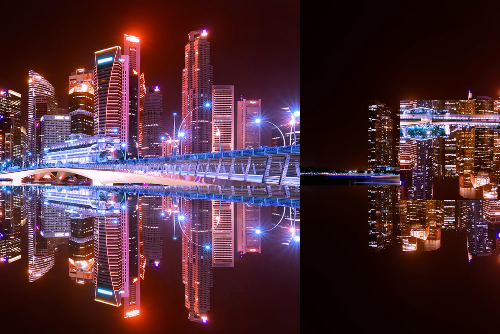

In [115]:
r,g,b = im.split()
Im.merge("RGB",(b,g,r))

**Notice the change in color of the image with changes in index of the bands**

**Beware: OpenCV returns BGR bands while PIL returns RGB bands while splitting**

### Image modificaation in bulk

In [116]:
import os,sys
os.chdir(path)

size = (128,128)
for infile in os.listdir():
    outfile = os.path.splitext(infile)[0] + ".thumbnail"
    if infile != outfile:
        try:
            im2 = Im.open(infile)
            im2.thumbnail(size)
            im2.save(outfile, "JPEG")
        except IOError:
            print("cannot create thumbnail for", infile)

### Transformations

#### Geometric Transformations

- Remember Resize!!

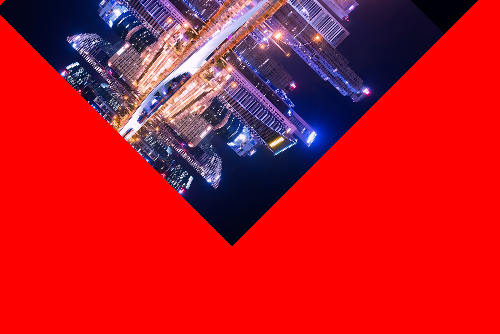

In [117]:
im.rotate(45,center=(10,10),fillcolor=(255,0,0)) #Rotate function with different attributes

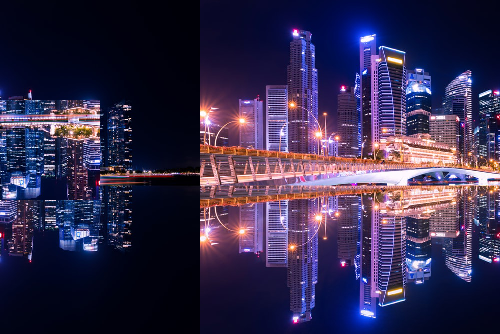

In [118]:
im.transpose(Im.FLIP_LEFT_RIGHT)

#### Color Transform

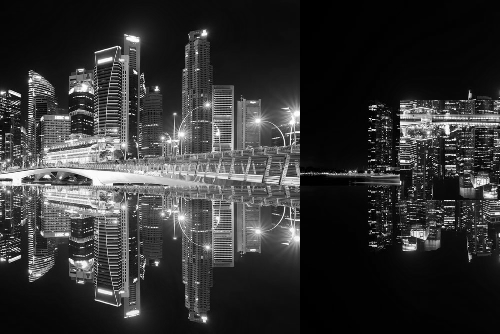

In [119]:
im.convert('L')

##### Different modes of an image

- 1 (1-bit pixels, black and white, stored with one pixel per byte)
- L (8-bit pixels, black and white)
- P (8-bit pixels, mapped to any other mode using a color palette)
- RGB (3x8-bit pixels, true color)
- RGBA (4x8-bit pixels, true color with transparency mask)
- CMYK (4x8-bit pixels, color separation)
- YCbCr (3x8-bit pixels, color video format)
- LAB (3x8-bit pixels, the L*a*b color space)
- HSV (3x8-bit pixels, Hue, Saturation, Value color space)
- I (32-bit signed integer pixels)
- F (32-bit floating point pixels)
- LA (L with alpha)
- PA (P with alpha)
- RGBX (true color with padding)
- RGBa (true color with premultiplied alpha)
- La (L with premultiplied alpha)
- I;16 (16-bit unsigned integer pixels)
- I;16L (16-bit little endian unsigned integer pixels)
- I;16B (16-bit big endian unsigned integer pixels)
- I;16N (16-bit native endian unsigned integer pixels)
- BGR;15 (15-bit reversed true colour)
- BGR;16 (16-bit reversed true colour)
- BGR;24 (24-bit reversed true colour)
- BGR;32 (32-bit reversed true colour)

#### Point Transformation

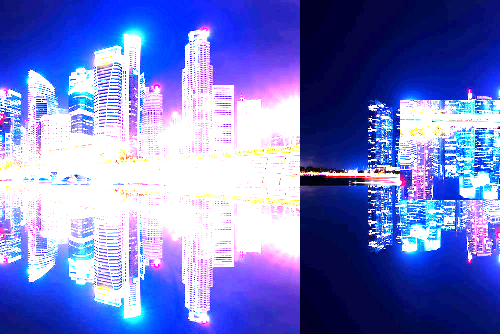

In [120]:
im.point(lambda i: i*5)

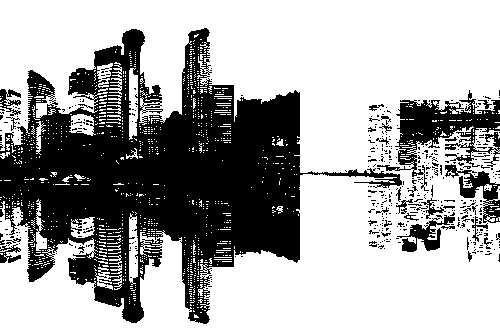

In [121]:
t = im.convert('L')
t.point(lambda i:i<50 and 255)   #threshholding image

## Image Enhancement

### Filters

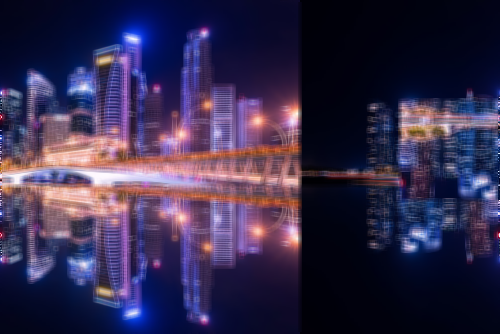

In [122]:
from PIL import ImageFilter as ifilter
im.filter(ifilter.BLUR)

### Enhancement

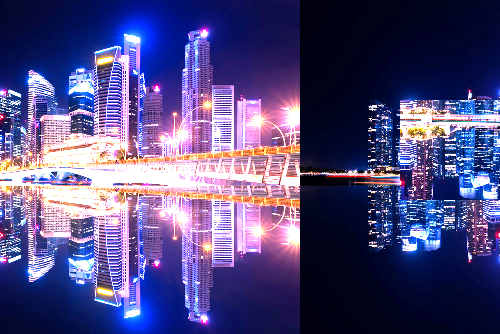

In [123]:
from PIL import ImageEnhance as Ienh
enh = Ienh.Brightness(im)              #There are other options too like Brightness,Sharpness,Filters etc.
enh.enhance(1.9)   #90% more contrast

## GIFS

0


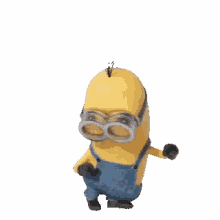

In [124]:
os.chdir(r"C:\Users\URVI PATEL\Downloads")
im = Im.open('test2.gif')
print(im.tell())
im

In [125]:
im.n_frames

7

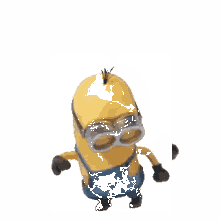

In [126]:
im.seek(3)
im

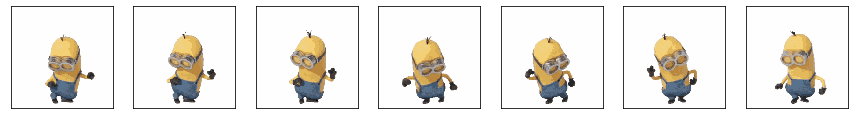

In [127]:
from PIL import ImageSequence as Imseq
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,im.n_frames,figsize=(15,15))

i=0
for frame in Imseq.Iterator(im):
    axes[i].imshow(frame)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    i+=1

### RGBA format: Effect of transparency band

In [128]:
import numpy as np
w, h = 256, 256
data = np.zeros((h, w, 4), dtype=np.uint8)
data[0:256, 0:256] = [255, 19, 20,200] # red patch with transparency band 100
img = Im.fromarray(data, 'RGBA')
img.show()

**Other most common commands: im.show and im.save to show and save image respectively**

## Explore: using dir

In [129]:
import PIL
dir(PIL)

['BlpImagePlugin',
 'BmpImagePlugin',
 'BufrStubImagePlugin',
 'CurImagePlugin',
 'DcxImagePlugin',
 'DdsImagePlugin',
 'EpsImagePlugin',
 'FitsStubImagePlugin',
 'FliImagePlugin',
 'FpxImagePlugin',
 'FtexImagePlugin',
 'GbrImagePlugin',
 'GifImagePlugin',
 'GimpGradientFile',
 'GimpPaletteFile',
 'GribStubImagePlugin',
 'Hdf5StubImagePlugin',
 'IcnsImagePlugin',
 'IcoImagePlugin',
 'ImImagePlugin',
 'Image',
 'ImageChops',
 'ImageColor',
 'ImageEnhance',
 'ImageFile',
 'ImageFilter',
 'ImageMode',
 'ImagePalette',
 'ImageSequence',
 'ImageShow',
 'ImageStat',
 'ImtImagePlugin',
 'IptcImagePlugin',
 'Jpeg2KImagePlugin',
 'JpegImagePlugin',
 'JpegPresets',
 'McIdasImagePlugin',
 'MicImagePlugin',
 'MpegImagePlugin',
 'MpoImagePlugin',
 'MspImagePlugin',
 'PILLOW_VERSION',
 'PaletteFile',
 'PalmImagePlugin',
 'PcdImagePlugin',
 'PcxImagePlugin',
 'PdfImagePlugin',
 'PdfParser',
 'PixarImagePlugin',
 'PngImagePlugin',
 'PpmImagePlugin',
 'PsdImagePlugin',
 'SgiImagePlugin',
 'SpiderImage